- 信息增益表示得知属性 a 的信息而使得样本集合不确定度减少的程度

- 如果选择一个特征后，信息增益最大（信息不确定性减少的程度最大），那么我们就选取这个特征。

- 信息增益=信息熵-条件熵

- 信息增益率=信息增益除以一个属性a的固有值

- ID3算法：通过信息增益选择特征

- C4.5算法：通过信息增益比作为特征选择的依据

- CART算法：使用gini系数选择特征，gini系数代表了模型的不纯度，gini系数越小，不纯度越低，特征越好


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('./House Price exercise/data/train.csv')
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
data.shape

(1460, 81)

In [4]:
for i in data.columns[1:]:
    if data[i].isnull().sum()>0:
        print(i,data[i].isnull().sum())

LotFrontage 259
Alley 1369
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


In [5]:
Deldata= data[[column for column in data if data[column].count()/len(data)>=0.3]]
del Deldata['Id']
print("删除的属性", end=" ")
for c in data.columns:
    if c not in Deldata.columns:
        print(c, end=", ")
print('\n')
data = Deldata

删除的属性 Id, Alley, PoolQC, Fence, MiscFeature, 



In [6]:
data.shape

(1460, 76)

In [7]:
isnull = data.isnull().sum(axis=0)
isnull[isnull > 0]/data.shape[0]

LotFrontage     0.177397
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
dtype: float64

In [8]:
data.fillna(method='pad', inplace=True)

In [9]:
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [10]:
numCol='LotFrontage/LotArea/MasVnrArea/BsmtFinSF1/BsmtFinSF2/BsmtUnfSF/TotalBsmtSF/1stFlrSF/2ndFlrSF/LowQualFinSF/GrLivArea/BsmtFullBath/BsmtHalfBath/FullBath/HalfBath/BedroomAbvGr/KitchenAbvGr/TotRmsAbvGrd/Fireplaces/GarageCars/GarageArea/WoodDeckSF/OpenPorchSF/EnclosedPorch/3SsnPorch/ScreenPorch/PoolArea/MiscVal/MoSold/YrSold/YearBuilt/YearRemodAdd/GarageYrBlt/SalePrice'
num=numCol.split('/')
numFeature=data[num]
numFeature.shape

(1460, 34)

In [11]:
data[numFeature.columns].describe().loc['min':'max'].T

,min,25%,50%,75%,max
LotFrontage,21.0,59.00,70.0,80.00,313.0
LotArea,1300.0,7553.50,9478.5,11601.50,215245.0
MasVnrArea,0.0,0.00,0.0,165.25,1600.0
BsmtFinSF1,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,0.0,0.00,0.0,0.00,1474.0
BsmtUnfSF,0.0,223.00,477.5,808.00,2336.0
TotalBsmtSF,0.0,795.75,991.5,1298.25,6110.0
1stFlrSF,334.0,882.00,1087.0,1391.25,4692.0
2ndFlrSF,0.0,0.00,0.0,728.00,2065.0
LowQualFinSF,0.0,0.00,0.0,0.00,572.0


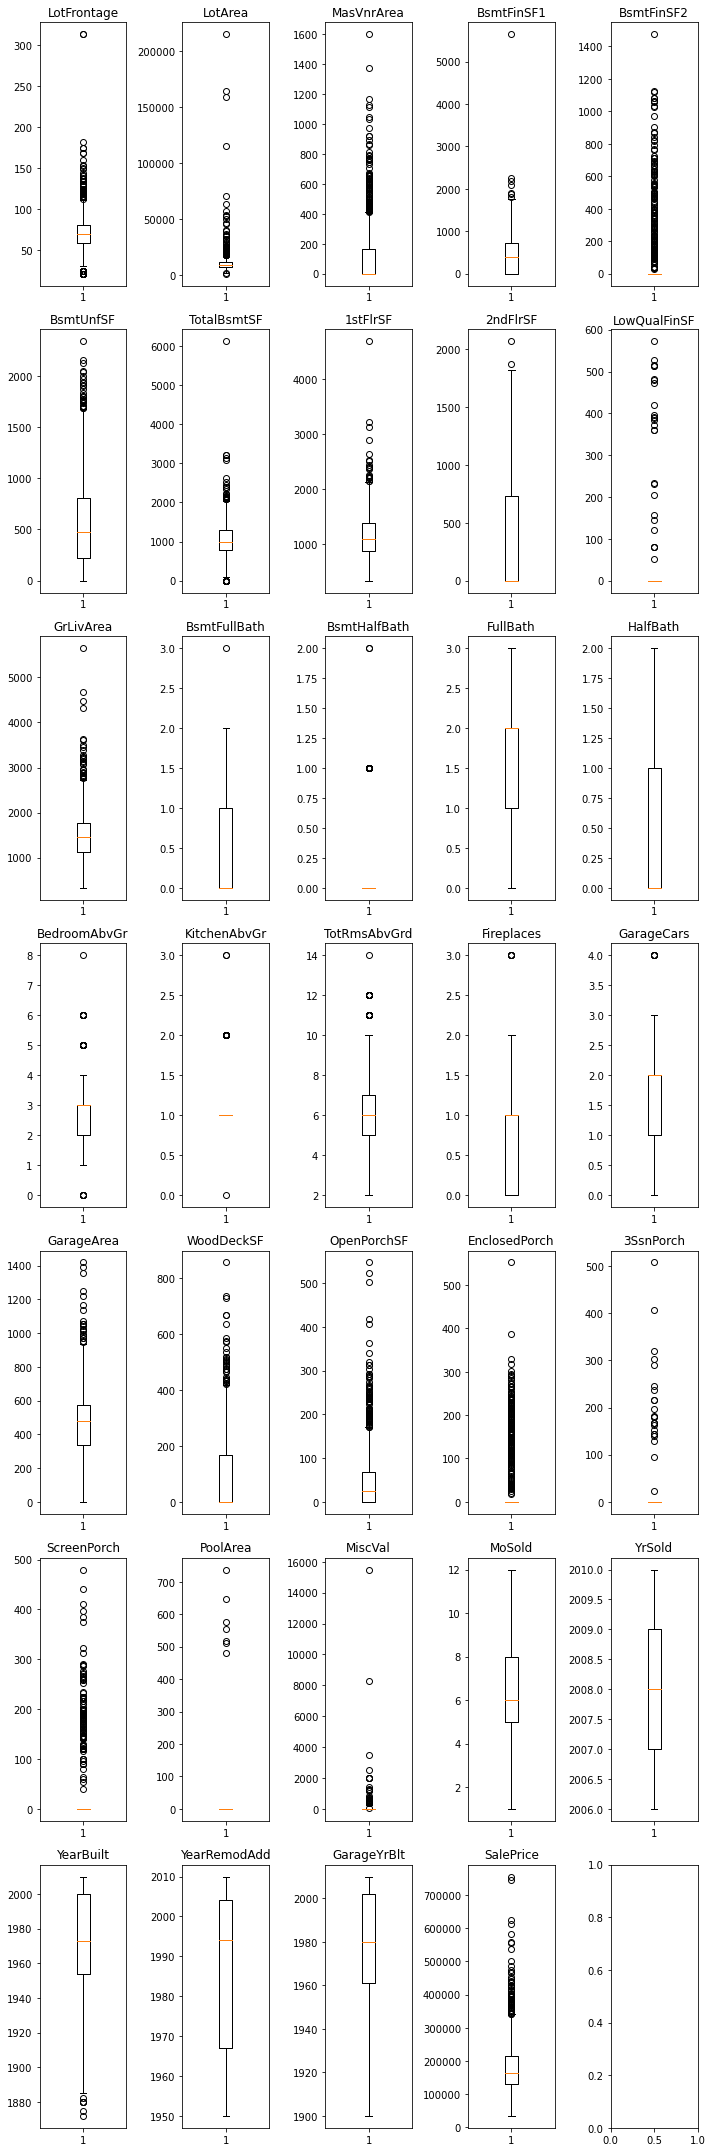

In [12]:
fig, axes = plt.subplots(7, 5, figsize=(10, 30))
#, figsize=(15, 20)
for i,col in enumerate(numFeature.columns):
    axes[i//5, i%5].boxplot(data[col].values)
    axes[i//5, i%5].set_title(col)
fig.tight_layout()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000143B94019A0>,
      dtype=object)

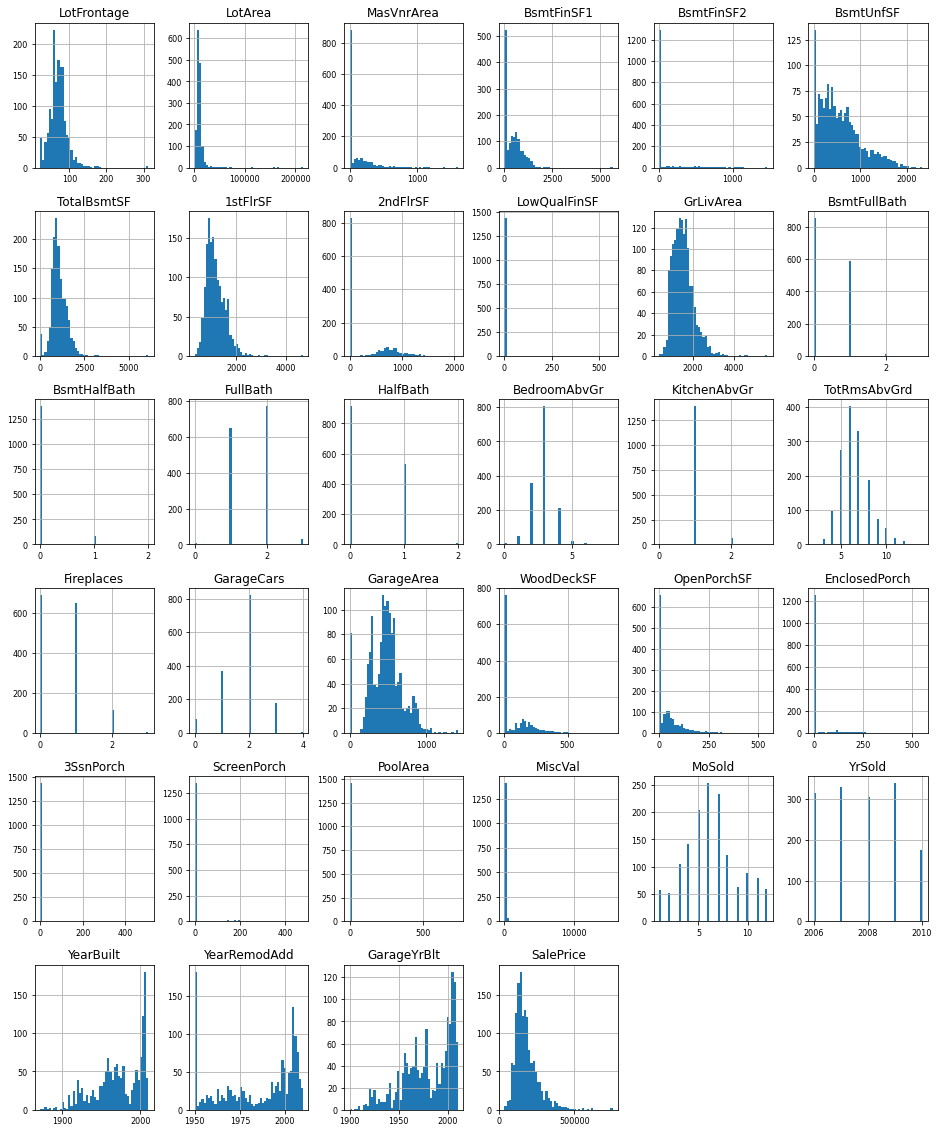

In [13]:
numFeature.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [21]:
Nominal='MSSubClass/MSZoning/Street/LotShape/LandContour/Utilities/LotConfig/LandSlope/Neighborhood/Condition1/Condition2/BldgType/HouseStyle/OverallQual/OverallCond/RoofStyle/RoofMatl/Exterior1st/Exterior2nd/MasVnrType/ExterQual/ExterCond/Foundation/BsmtQual/BsmtCond/BsmtExposure/BsmtFinType1/BsmtFinType2/Heating/HeatingQC/CentralAir/Electrical/KitchenQual/Functional/FireplaceQu/GarageType/GarageFinish/GarageQual/GarageCond/PavedDrive/SaleType/SaleCondition'
NomFeature=data[Nominal.split('/')]
NomFeature.shape

(1460, 42)

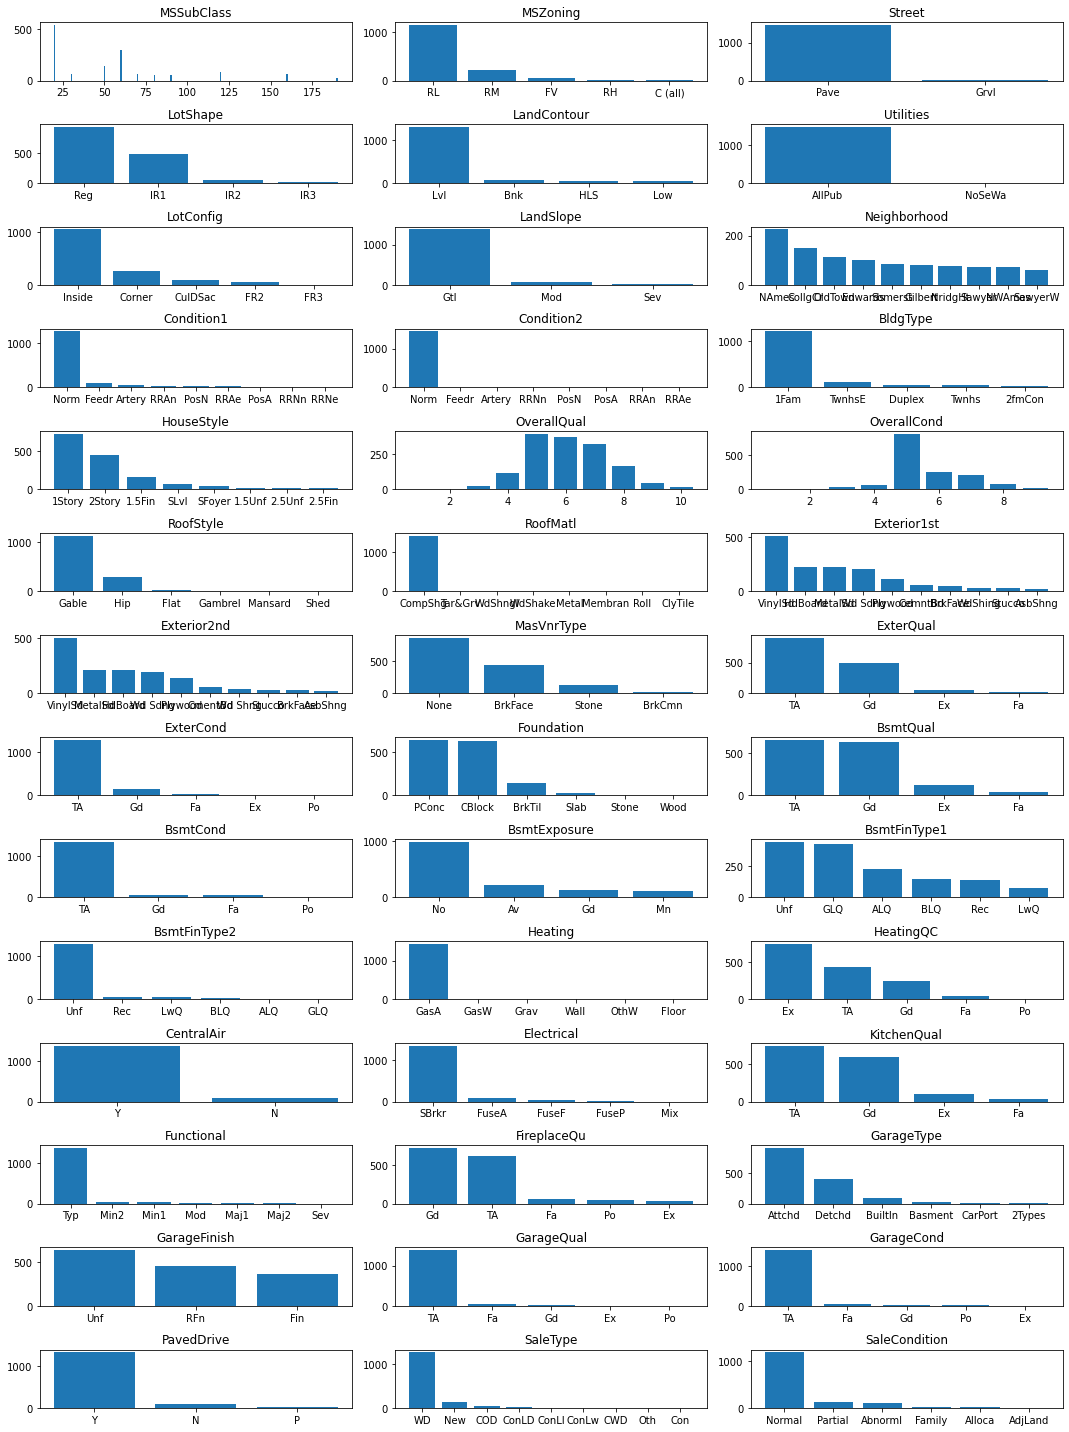

In [22]:
fig, axes = plt.subplots(14, 3, figsize=(15, 20))
#, figsize=(15, 20)
for i,col in enumerate(NomFeature.columns):
    c = data[col].value_counts()[:10]
    axes[i//3, i%3].bar(c.index,c.values)
    axes[i//3, i%3].set_title(col)
fig.tight_layout()

In [14]:
correlation1 = numFeature.corr()

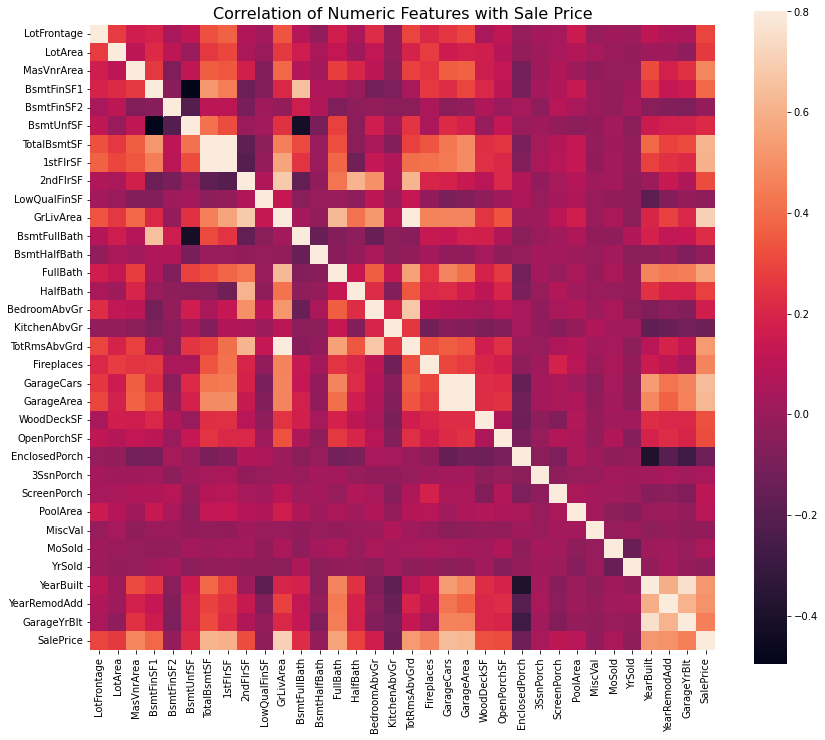

In [15]:
f , ax = plt.subplots(figsize = (14,12))
plt.title('Correlation of Numeric Features with Sale Price',y=1,size=16)
sns.heatmap(correlation1,square = True,  vmax=0.8)

Index(['SalePrice', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd'],
      dtype='object')


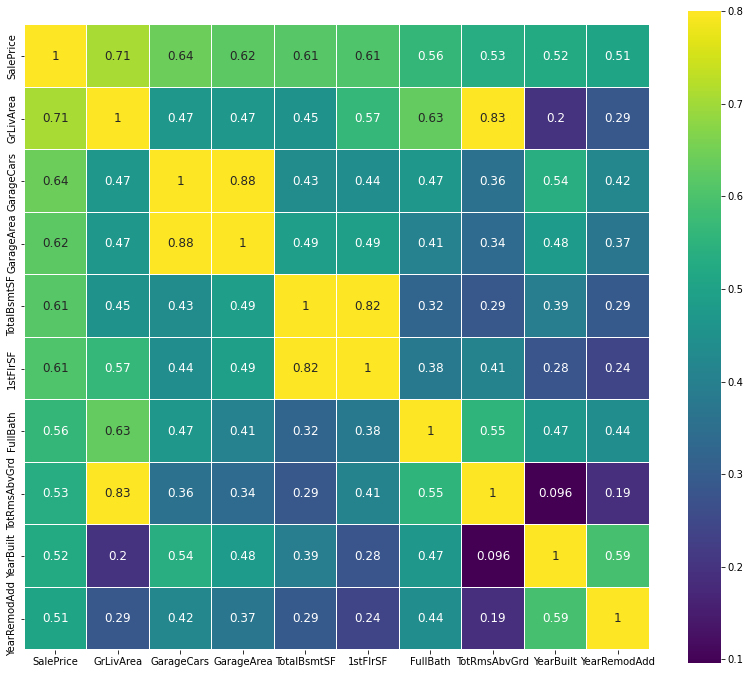

In [16]:
k= 10
cols1 = correlation1.nlargest(k,'SalePrice')['SalePrice'].index


print(cols1)
cm = np.corrcoef(data[cols1].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols1.values ,annot_kws = {'size':12},yticklabels = cols1.values)

In [17]:
numeric_feature = data[['GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']]

In [18]:
numeric_feature.to_csv('numeric_feature.csv', index=False)

In [23]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
data2=data.copy()
for i in NomFeature.columns:
    if data2[i].dtype=='O':
        data2[i]=number.fit_transform(data[i].astype('str'))

In [20]:
data2

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [24]:
Corr='MSSubClass/MSZoning/Street/LotShape/LandContour/Utilities/LotConfig/LandSlope/Neighborhood/Condition1/Condition2/BldgType/HouseStyle/OverallQual/OverallCond/RoofStyle/RoofMatl/Exterior1st/Exterior2nd/MasVnrType/ExterQual/ExterCond/Foundation/BsmtQual/BsmtCond/BsmtExposure/BsmtFinType1/BsmtFinType2/Heating/HeatingQC/CentralAir/Electrical/KitchenQual/Functional/FireplaceQu/GarageType/GarageFinish/GarageQual/GarageCond/PavedDrive/SaleType/SaleCondition/SalePrice'
NomFeatures=data2[Corr.split('/')]
correlation2 = NomFeatures.corr()

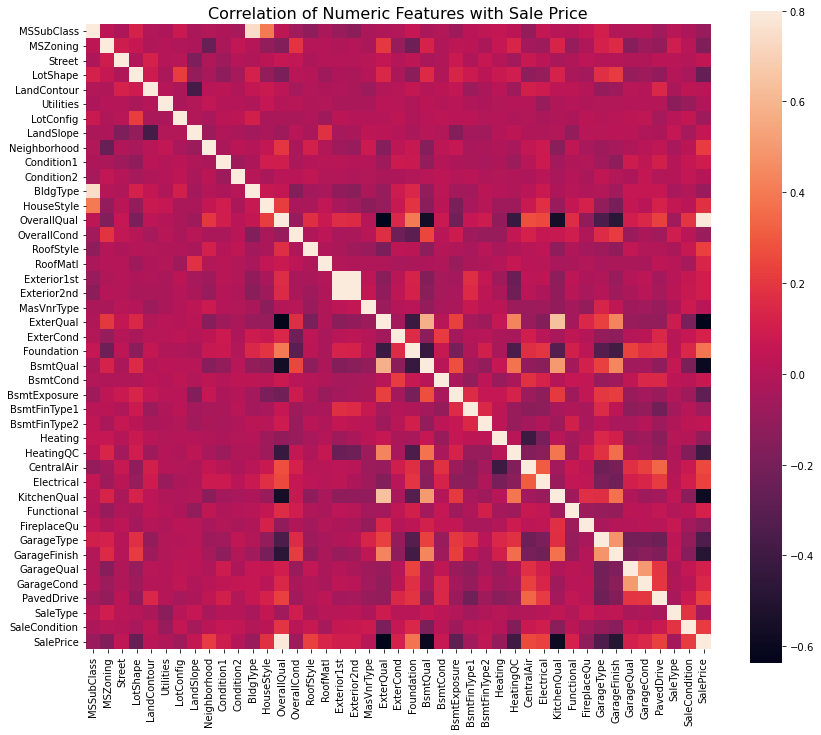

In [25]:
f , ax = plt.subplots(figsize = (14,12))
plt.title('Correlation of Numeric Features with Sale Price',y=1,size=16)
sns.heatmap(correlation2,square = True,  vmax=0.8)

Index(['SalePrice', 'OverallQual', 'Foundation', 'CentralAir', 'Electrical',
       'PavedDrive', 'RoofStyle', 'SaleCondition', 'Neighborhood',
       'HouseStyle'],
      dtype='object')


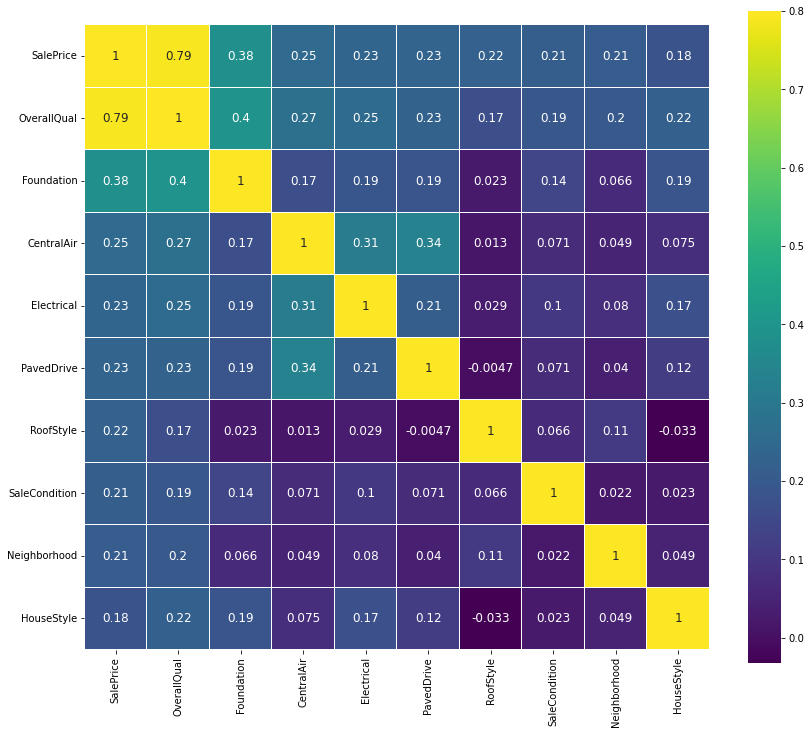

In [26]:
k= 10
cols = correlation2.nlargest(k,'SalePrice')['SalePrice'].index
print(cols)
cm = np.corrcoef(data2[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

In [27]:
catData = pd.get_dummies(NomFeature.astype(str))

catData.shape

(1460, 274)

In [28]:
catData

,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1456,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1457,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1458,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [29]:
catData.to_csv('normal_feature_corr.csv', index=False)

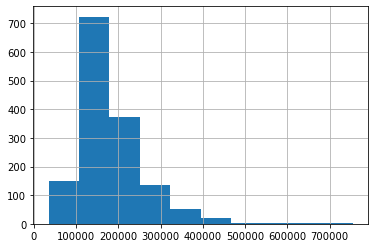

In [30]:
data.SalePrice.hist()

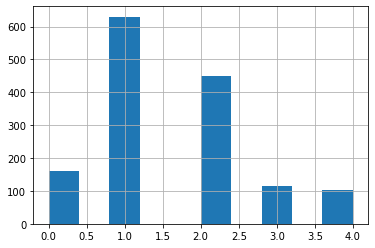

In [31]:
# 连续 => 离散
def price_map(x):
    if x <= 108000:
        return 0
    elif x <= 170000:
        return 1
    elif x <= 250000:
        return 2
    elif x <= 310000:
        return 3
    else:
        return 4
    
sale_price = data.SalePrice.map(price_map)
data['sale_price'] = sale_price
sale_price.hist()

In [32]:
import numpy as np
def Entropy(x):
    x = np.array(x)
    x = x/sum(x)
    return -(x*np.log2(x)).sum()

def gain_rate(data, colA, colB):
    weight = data.groupby([colA]).size()/data.shape[0]
    entropy_A = Entropy(data[colA].value_counts())
    entropy_B = Entropy(data[colB].value_counts())
    gain = entropy_A - (weight*data.groupby([colA]).apply(lambda x: Entropy(x[colB].value_counts()))).sum()
    
    return gain/(entropy_A*entropy_B)

In [33]:
value_counts = NomFeature.apply(lambda x: x.value_counts().size, axis=0)
idx = value_counts[value_counts < 20].index

gains = []
for col in idx:
    gains.append([col, gain_rate(data, col, 'sale_price')])
    
gains = pd.DataFrame(gains, columns=['attribute', 'gainRate'])
attributes = gains.sort_values(by=['gainRate'], ascending=False).values[1:10, 0]
gains.sort_values(by=['gainRate'], ascending=False)[:20]

,attribute,gainRate
12,OverallQual,0.258362
0,MSSubClass,0.230104
17,Exterior2nd,0.193903
16,Exterior1st,0.183762
25,BsmtFinType1,0.123090
13,OverallCond,0.034916
11,HouseStyle,0.004557
22,BsmtQual,-0.027344
31,KitchenQual,-0.039115
28,HeatingQC,-0.045437


In [49]:
nomfeature = pd.get_dummies(data[attributes].astype(str))

nomfeature.shape

(1460, 82)

In [50]:
nomfeature

,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,...,BsmtQual_TA,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0
1456,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1457,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0
1458,0,0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0


In [51]:
nomfeature.to_csv('normal_feature_gainRate.csv', index=False)

In [52]:
data.SalePrice.to_csv('SalePrice.csv',index=False)

## 随机森林模型预测房价

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math
import os

In [54]:
# 归一化处理
def normalize(df):
    #df = (df - df.min()) / (df.max() - df.min())
    for col in df.columns[:-1]:
        df[col]= (df[col] - df[col].min()) / (df[col].max() - df[col].min())
    return df

In [77]:
def load_data():
#     导入训练集
    feature1Path = os.path.realpath("numeric_feature.csv")
    feature2Path = os.path.realpath("normal_feature_gainRate.csv")
    pricePath = os.path.realpath("SalePrice.csv")
    train_data = pd.concat([pd.read_csv(feature1Path), pd.read_csv(feature2Path)], axis=1)

    df2 = pd.read_csv(pricePath)
    # 数据归一化
    train_data = normalize(train_data)

    x = train_data.iloc[:, :-1] # 前89列为特征
    y = df2 # 最后一列为标签

    # 划分数据集(训练集占75%，测试集占25%)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = None)

    return train_data, x_train,x_test, y_train, y_test

In [78]:
# 创建随机森林模型
def model(train_x,train_y):
    my_model = RandomForestRegressor()
    my_model.fit(train_x, train_y.values.flatten())
    return my_model

In [79]:
train_data, train_x, test_x, train_y, test_y = load_data()
# 创建随机森林模型并进行训练和预测
my_model = model(train_x,train_y)
predicted_prices = my_model.predict(test_x)
#test_y_list = test_y['Label'].tolist()

# 均方误差作为评价指标
print("\n预测结果与样本的MAE为：")
print(math.log(mean_absolute_error(test_y,predicted_prices, multioutput='uniform_average')))
print("预测结果与样本的RMSE为")
print(math.log(np.sqrt(mean_squared_error(test_y,predicted_prices))))

# 保存预测结果
my_results = pd.DataFrame({'SalePrice': predicted_prices})
my_results.to_csv('PredictionResults.csv', index=False)
test_y.to_csv('PredictionSample.csv', index=False)


预测结果与样本的MAE为：
9.861728308235147
预测结果与样本的RMSE为
10.351659837291919


## 贝叶斯方法预测房价

In [90]:
from sklearn import linear_model, svm, gaussian_process
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [91]:
df = pd.concat([pd.read_csv("numeric_feature.csv"), pd.read_csv("normal_feature_corr.csv")], axis=1)

In [92]:
for col in df.columns:
    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

df2 = pd.read_csv("SalePrice.csv")

In [93]:
train_X, test_X, train_y, test_y = train_test_split(df, df2, test_size=0.25, random_state=42)

In [94]:
clf =linear_model.BayesianRidge()
clf.fit(train_X, train_y)
y_pred = clf.predict(test_X)

In [95]:
print("\n预测结果与样本的MAE为：")
print(np.log(mean_absolute_error(y_pred, test_y)))
print("预测结果与样本的RMSE为")
print(np.log(np.sqrt(mean_squared_error(test_y,y_pred))))


预测结果与样本的MAE为：
9.926213882632558
预测结果与样本的RMSE为
10.315740169210178


## XGBoost预测房价

In [96]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math
import numpy as np

In [99]:
feature1Path = os.path.realpath("numeric_feature.csv")
feature2Path = os.path.realpath("normal_feature_corr.csv")
pricePath = os.path.realpath("SalePrice.csv")
df = pd.concat([pd.read_csv(feature1Path), pd.read_csv(feature2Path)], axis=1)

In [102]:
for col in df.columns:
    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

df2 = pd.read_csv(pricePath)

In [103]:
# 划分数据集
train_X, test_X, train_y, test_y = train_test_split(df, df2, test_size=0.25, random_state=None)

In [104]:
# 训练回归模型
xg = XGBRegressor( n_estimators=500, learning_rate=0.1, min_child_weight=5, max_depth=4)
xg.fit(train_X, train_y)
xg.score(test_X, test_y)

0.8624428971743723

In [105]:
pre_y = xg.predict(test_X)

In [106]:
print("\n预测结果与样本的MAE为：")
print(math.log(mean_absolute_error(test_y,pre_y, multioutput='uniform_average')))
print("预测结果与样本的RMSE为")
print(math.log(np.sqrt(mean_squared_error(test_y,pre_y))))


预测结果与样本的MAE为：
9.860342092965546
预测结果与样本的RMSE为
10.399958728272022
